<h2 style="color:green" align="center">Handwritten digits classification using neural network</h2>

Classifying handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
# Looking at individual sample

X_train[0].shape     # the sample is 28 * 28 pixel image

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

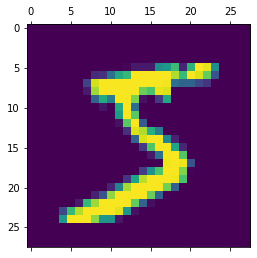

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
# Scalling it by 255 because each individual values is in range between 0 to 255

X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:green'>model building</h3>

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4861 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2856 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.9261


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9268


[0.26677584648132324, 0.926800012588501]

**Sample prediction 1**

In [16]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.9622628e-05, 9.9806656e-11, 7.9830716e-05, 8.4540844e-03,
       1.4381222e-06, 1.0649716e-04, 1.0138114e-09, 7.0092213e-01,
       7.7388606e-05, 9.5832348e-04], dtype=float32)

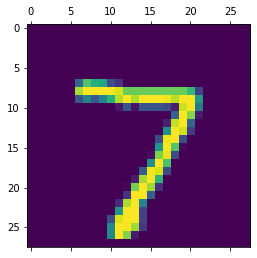

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**m

In [18]:
np.argmax(y_pred[0])

7

**Sample prediction 2**

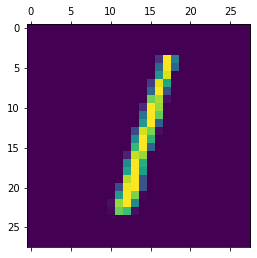

In [19]:
plt.matshow(X_test[2])

In [20]:
np.argmax(y_pred[2])

1

<h3 style='color:green'>Using hidden layer</h3>

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(50, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3773 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1482 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9790


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9745


[0.08401911705732346, 0.9745000004768372]

<h3 style='color:green'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1347 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0964 - accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0749 - accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9868
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9909: 2s - loss: 0.0 - ETA: 2s - loss: 0.0255 - ac - ETA: 2s - loss: 0.0254 - accuracy 

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9767


[0.084374338388443, 0.9767000079154968]